# Multiple Linear Regression

- Datasets to be used
    1. SP50_startups.csv
    2. Admission.csv
    
### using 50_startups.csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Matplotlib is building the font cache; this may take a moment.


In [2]:
data= pd.read_csv("./DataSets/S&P500_Stock_Data.csv")
data.head()

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337
3,1.977960,49.908353,2140.434475
4,2.437723,52.035492,2411.275663


In [3]:
data.rename(columns={"Interest Rates": "IR", "S&P 500 Price": "Price"}, inplace=True)
data.tail()

,IR,Employment,Price
995,2.528420,52.390828,2578.699184
996,2.643571,54.626204,2573.865933
997,2.009644,57.004357,2004.911218
998,2.201656,62.447790,2344.098981
999,2.180638,46.297034,2156.133786


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   IR          1000 non-null   float64
 1   Employment  1000 non-null   float64
 2   Price       1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


In [5]:
data.describe()

,IR,Employment,Price
count,1000.000000,1000.000000,1000.000000
mean,2.195392,56.254855,2319.999936
std,0.241630,4.862178,193.854745
min,1.500000,40.000000,1800.000000
25%,2.035735,53.029784,2190.447901
50%,2.198214,56.160941,2312.443024
75%,2.359061,59.422633,2455.764328
max,3.000000,70.000000,3000.000000


<AxesSubplot:>

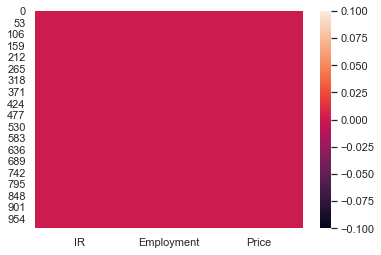

In [6]:
sns.heatmap(data.isna())

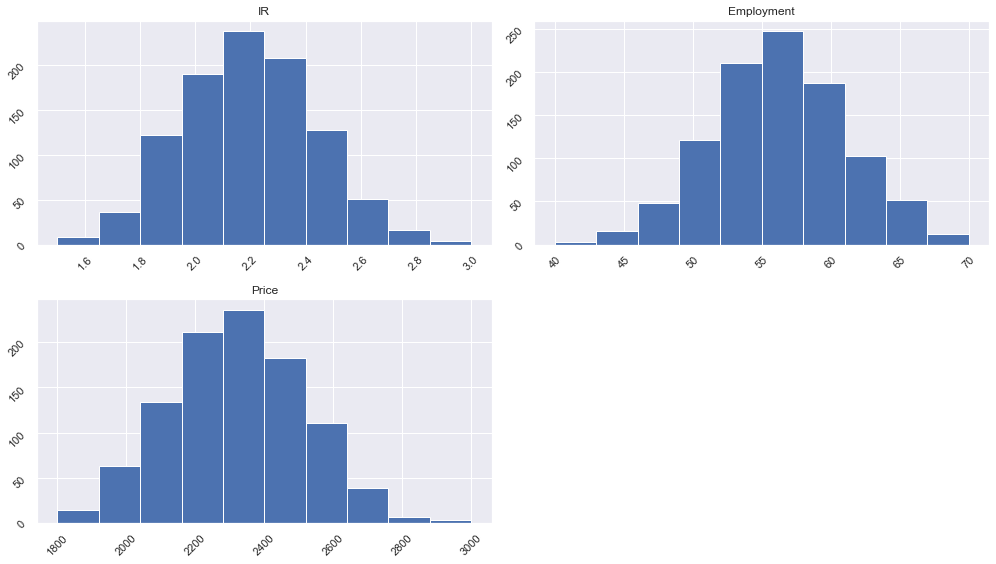

In [7]:
data.hist(figsize=(14,8), bins=10, xrot=45, yrot=45)
plt.tight_layout()

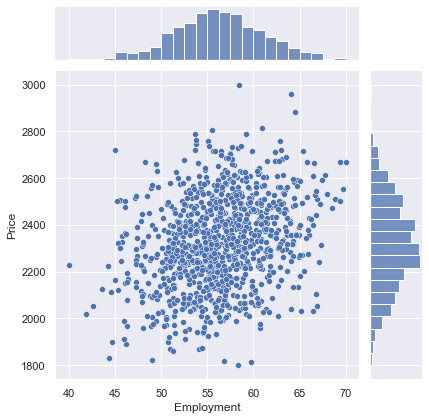

In [8]:
sns.jointplot(x="Employment", y="Price" , data=data)

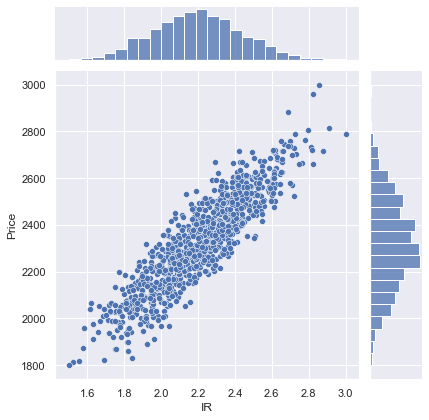

In [9]:
sns.jointplot(x="IR", y="Price" , data=data)

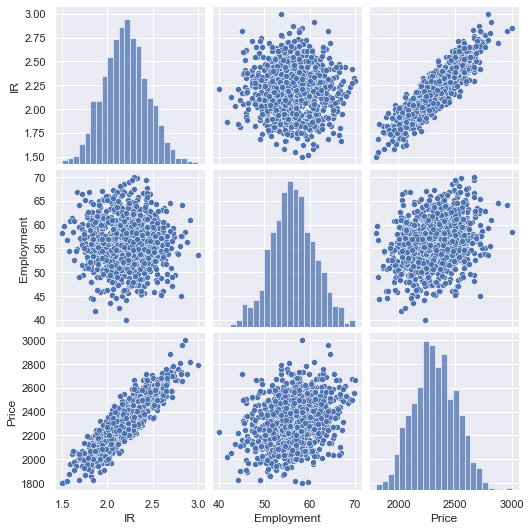

In [10]:
sns.pairplot(data)

<AxesSubplot:>

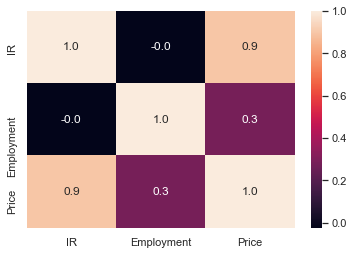

In [11]:
sns.heatmap(data.corr(), fmt="0.1f", annot=True)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
model1= LinearRegression(fit_intercept=True)
model2= StandardScaler()

pipeline= make_pipeline(model2, model1)

In [33]:
x= data.iloc[:,[0,1]]
y= data.iloc[:,2]

In [34]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.4, random_state=42)

In [35]:
pipeline.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [36]:
lr= pipeline.named_steps['linearregression']  
lr.coef_, lr.intercept_

(array([179.51768262,  58.64168114]), 2325.0768642150006)

In [40]:
preds= pipeline.predict(x_test)

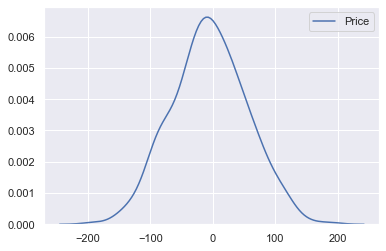

In [41]:
sns.kdeplot(y_test-preds)

In [43]:
r2= r2_score(y_test, preds)
mse= mean_squared_error(y_test, preds)

r2, mse

(0.8976290187276574, 3612.105522754688)

### using Admissions.csv

In [82]:
data= pd.read_csv("./DataSets/Admission.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [83]:
data.drop(columns="Serial No.", inplace=True)
data.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admission Chance
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67
399,333,117,4,5.0,4.0,9.66,1,0.95


In [84]:
data.rename(columns={"GRE Score": "GRE", "TOEFL Score": "TOEFL", "University Rating": "Rating", "Admission Chance": "Probability"}, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GRE          400 non-null    int64  
 1   TOEFL        400 non-null    int64  
 2   Rating       400 non-null    int64  
 3   SOP          400 non-null    float64
 4   LOR          400 non-null    float64
 5   CGPA         400 non-null    float64
 6   Research     400 non-null    int64  
 7   Probability  400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [85]:
unique_values= data.nunique()
unique_values

# Rating, SOP, LOR, Research are categorical types

GRE             49
TOEFL           29
Rating           5
SOP              9
LOR              9
CGPA           168
Research         2
Probability     60
dtype: int64

In [86]:
cols= unique_values[unique_values<10].index

mapper= {}

for col in cols :
    mapper[col]="category" 

cols, mapper

(Index(['Rating', 'SOP', 'LOR ', 'Research'], dtype='object'),
 {'Rating': 'category',
  'SOP': 'category',
  'LOR ': 'category',
  'Research': 'category'})

In [87]:
# Coverting Data types 
# https://stackoverflow.com/a/28648923/12210002

data= data.astype( mapper,errors="ignore")
data.dtypes

GRE               int64
TOEFL             int64
Rating         category
SOP            category
LOR            category
CGPA            float64
Research       category
Probability     float64
dtype: object

In [88]:
data.describe()

,GRE,TOEFL,CGPA,Probability
count,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,8.598925,0.724350
std,11.473646,6.069514,0.596317,0.142609
min,290.000000,92.000000,6.800000,0.340000
25%,308.000000,103.000000,8.170000,0.640000
50%,317.000000,107.000000,8.610000,0.730000
75%,325.000000,112.000000,9.062500,0.830000
max,340.000000,120.000000,9.920000,0.970000


In [89]:
data.describe(include=["category"])

,Rating,SOP,LOR,Research
count,400,400.0,400.0,400
unique,5,9.0,9.0,2
top,3,4.0,3.0,1
freq,133,70.0,85.0,219


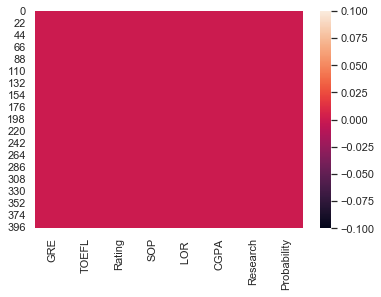

In [90]:
sns.heatmap(data.isnull()) # No Null value

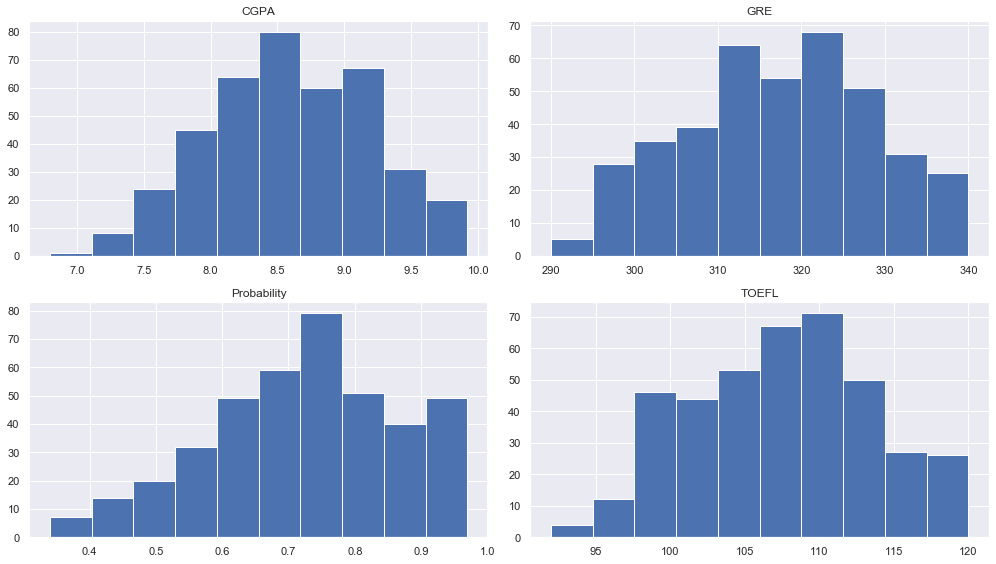

In [91]:
data.hist( figsize=(14,8))
plt.tight_layout()

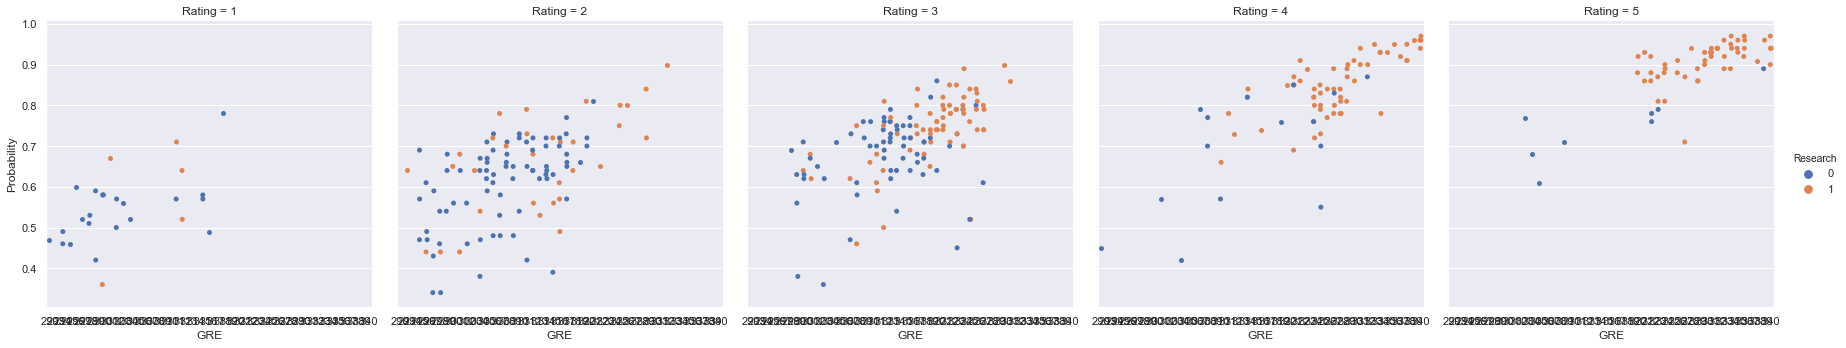

In [103]:
sns.catplot(x="GRE", y= "Probability", data=data, hue="Research", col="Rating")

# People with  high GRE scores, rating > 3  , research with postive feedback (1) have higher probabilities of getting admission

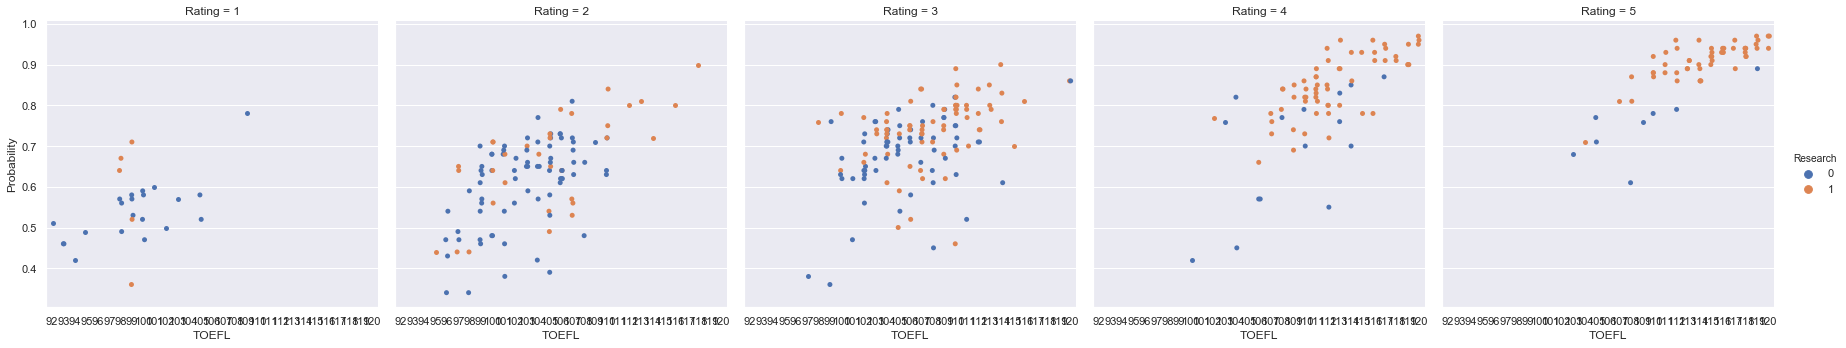

In [104]:
sns.catplot(x="TOEFL", y= "Probability", data=data, hue="Research",col="Rating")

# People with high TOEFL scores, rating > 3  , research with postive feedback (1) have higher probabilities of getting admission

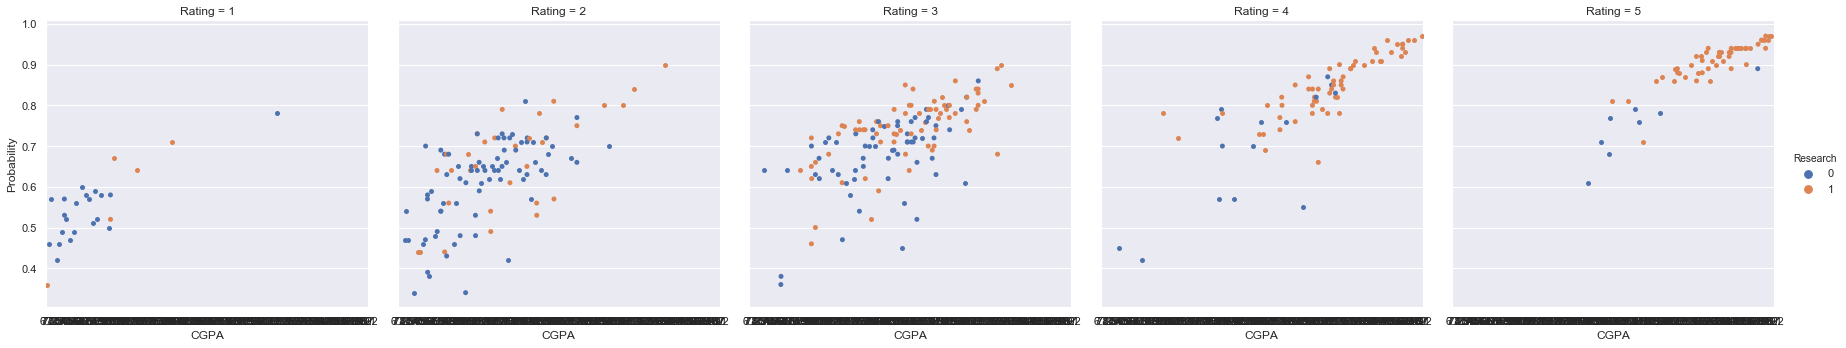

In [105]:
sns.catplot(x="CGPA", y= "Probability", data=data, hue="Research",col="Rating")

# People with  high CGPA scores, rating > 3  , research with postive feedback (1) have higher probabilities of getting admission

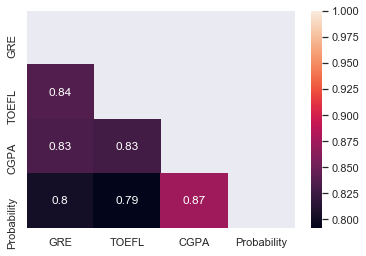

In [108]:
# Corelation Matric : Only Lower part
# https://stackoverflow.com/a/65455988/12210002

corr= data.corr()
upper=  np.triu(corr)

sns.heatmap(corr, mask= upper, annot= True)

## we can use ColumnTransformer or makeColumnTransformer

- [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)
- [makeColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html)

## Instead of selecting columns manually, we can use make_column_selector

- [link](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_selector.html#sklearn.compose.make_column_selector)

## More on Pipeline + ColumnTransformer

- [link1](https://jorisvandenbossche.github.io/blog/2018/05/28/scikit-learn-columntransformer/)
- [link2](https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/)
- [link3](https://towardsdatascience.com/using-columntransformer-to-combine-data-processing-steps-af383f7d5260)

## Advanced

- [link4](https://stackoverflow.com/a/54160620/12210002)
- [link5](https://www.kaggle.com/kylegilde/building-columntransformers-dynamically)

#### First way
-------------------------------

In [123]:
# Selecting numerical and categorical columns manually

# https://stackoverflow.com/a/32399908/12210002
# https://stackoverflow.com/a/28155580/12210002

cat_columns= data.select_dtypes(include="category").columns
num_columns= data.select_dtypes(include="number").columns.drop(labels=["Probability"])

cat_columns, num_columns

(Index(['Rating', 'SOP', 'LOR ', 'Research'], dtype='object'),
 Index(['GRE', 'TOEFL', 'CGPA'], dtype='object'))

In [124]:
encoder= OneHotEncoder(handle_unknown="ignore") # One hot encoder

categorical_preprocessor= make_pipeline(SimpleImputer(strategy="most_frequent"), 
                                         encoder 
                                        )

numerical_preprocessor= make_pipeline( SimpleImputer(strategy='median'), 
                                        StandardScaler()
                                      )

transformer= ColumnTransformer( transformers=[ ("cat", categorical_preprocessor, cat_columns), 
                                               ("num", numerical_preprocessor, num_columns)
                                             ],
                               remainder='passthrough' 
                              )

lr= LinearRegression(fit_intercept=True)

model= make_pipeline(transformer, lr)


#### Second way

In [13]:
encoder= OneHotEncoder(handle_unknown="ignore") # One hot encoder

categorical_preprocessor= make_pipeline(SimpleImputer(strategy="most_frequent"), 
                                         encoder 
                                        )

numerical_preprocessor= make_pipeline( SimpleImputer(strategy='median'), 
                                        StandardScaler()
                                      )


####################################
## Here is the difference  : using make_column_Selector
# https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_selector.html#sklearn.compose.make_column_selector
####################################
transformer= make_column_transformer( (categorical_preprocessor, make_column_selector(dtype_include="category")) , 
                                      (numerical_preprocessor, make_column_selector(dtype_include=np.number)),
                               remainder='passthrough' 
                              )

lr= LinearRegression(fit_intercept=True)

model2= make_pipeline(transformer, lr)


In [139]:
x= data.iloc[:,:-1]
y= data.iloc[:, -1]

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.4, random_state=42)


In [140]:
model2.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('pipeline-1',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='most_frequent',
                             

In [14]:
from sklearn import set_config

set_config(display='diagram')

model2

# Displaying in diagram the pipeline
# https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000015A489F6248>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000015A488CCC48>)])),
                ('linearregression', LinearRegression())])

In [141]:
preds= model2.predict(x_test)

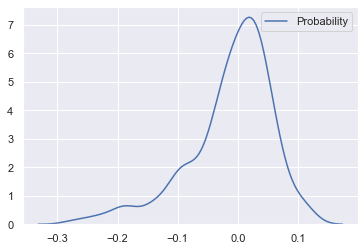

In [142]:
sns.kdeplot(y_test-preds)

In [143]:
r2= r2_score(y_test, preds)
mse= mean_squared_error(y_test, preds)

r2, mse

(0.7584983137961016, 0.005147637685780909)